<a href="https://colab.research.google.com/github/chiyanglin-AStar/science_coding/blob/main/4_chaos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Chaos

 One classic example of chaos in a simple mathematical system is the logistic map. The logistic map is a discrete-time dynamical system that exhibits chaotic behavior under certain conditions. Here's a simple Python code to visualize the chaotic behavior of the logistic map:

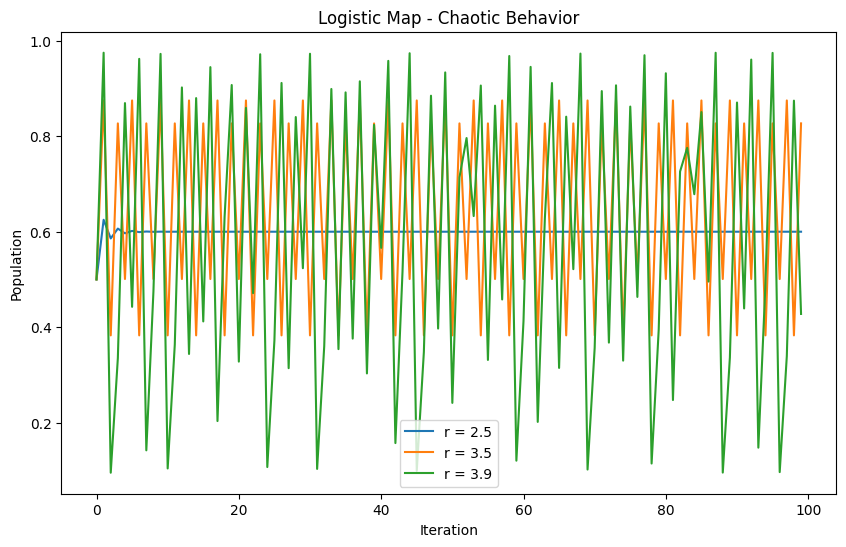

In [1]:
import matplotlib.pyplot as plt

def logistic_map(x, r):
    return r * x * (1 - x)

def generate_logistic_map_sequence(x0, r, n):
    sequence = [x0]
    for _ in range(n - 1):
        xn = logistic_map(sequence[-1], r)
        sequence.append(xn)
    return sequence

# Parameters
x0 = 0.5  # Initial condition
r_values = [2.5, 3.5, 3.9]  # Different values of the parameter 'r'
n = 100  # Number of iterations

# Generate and plot logistic map sequences
plt.figure(figsize=(10, 6))
for r in r_values:
    sequence = generate_logistic_map_sequence(x0, r, n)
    plt.plot(sequence, label=f'r = {r}')

plt.title('Logistic Map - Chaotic Behavior')
plt.xlabel('Iteration')
plt.ylabel('Population')
plt.legend()
plt.show()

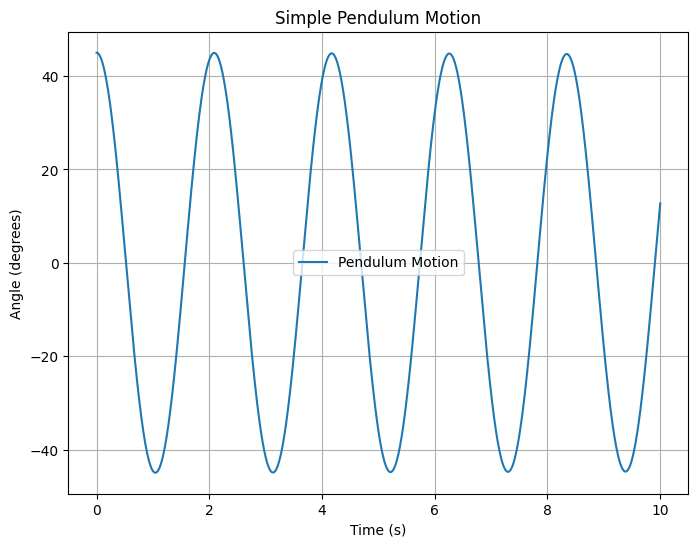

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Function representing the differential equations for a simple pendulum
def pendulum_equations(t, y, l, g):
    theta, omega = y
    dydt = [omega, -(g / l) * np.sin(theta)]
    return dydt

# Parameters
length = 1.0  # Length of the pendulum
gravity = 9.8  # Acceleration due to gravity

# Initial conditions
initial_theta = np.radians(45.0)  # Initial angle in radians
initial_omega = 0.0  # Initial angular velocity

initial_state = [initial_theta, initial_omega]

# Time span for the simulation
t_span = (0, 10)  # Simulate for 10 seconds

# Solve the differential equations using solve_ivp
solution = solve_ivp(
    lambda t, y: pendulum_equations(t, y, length, gravity),
    t_span,
    initial_state,
    t_eval=np.linspace(t_span[0], t_span[1], 1000),
)

# Extracting results
theta_values = solution.y[0]
time_values = solution.t

# Plotting the motion of the pendulum
plt.figure(figsize=(8, 6))
plt.plot(time_values, np.degrees(theta_values), label='Pendulum Motion')
plt.title('Simple Pendulum Motion')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.grid(True)
plt.show()

## add initial little difference condition

To introduce chaos into the motion of a simple pendulum, we can make a slight modification to the initial conditions. Chaos often arises when the system is sensitive to initial conditions, and in the context of a pendulum, this sensitivity can be explored by starting with very close initial conditions but slightly varying one of them.

Here's an updated version of the code with an additional pendulum simulation starting with a very slightly different initial angle:

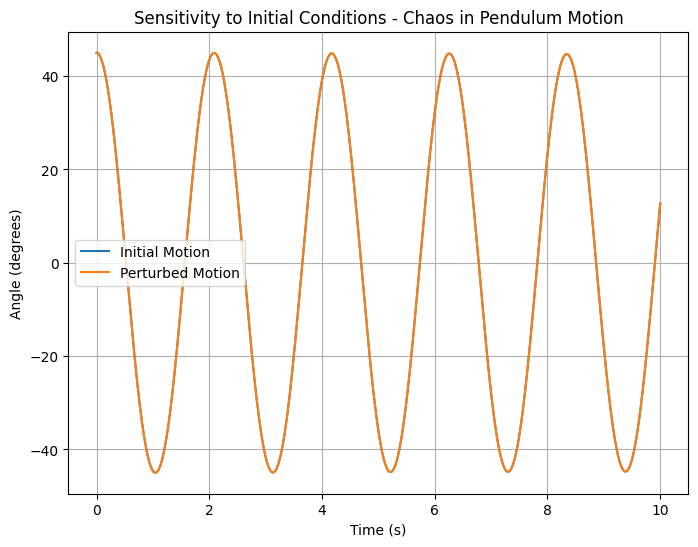

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def pendulum_equations(t, y, l, g):
    theta, omega = y
    dydt = [omega, -(g / l) * np.sin(theta)]
    return dydt

length = 1.0
gravity = 9.8

# Initial conditions
initial_theta = np.radians(45.0)
initial_omega = 0.0
initial_state = [initial_theta, initial_omega]

# Slightly different initial condition to explore sensitivity
perturbed_initial_theta = initial_theta + np.radians(0.01)
perturbed_initial_state = [perturbed_initial_theta, initial_omega]

# Time span for the simulation
t_span = (0, 10)

# Solve the differential equations for both initial conditions
solution = solve_ivp(
    lambda t, y: pendulum_equations(t, y, length, gravity),
    t_span,
    initial_state,
    t_eval=np.linspace(t_span[0], t_span[1], 1000),
)

perturbed_solution = solve_ivp(
    lambda t, y: pendulum_equations(t, y, length, gravity),
    t_span,
    perturbed_initial_state,
    t_eval=np.linspace(t_span[0], t_span[1], 1000),
)

# Extracting results
theta_values = solution.y[0]
perturbed_theta_values = perturbed_solution.y[0]
time_values = solution.t

# Plotting the motion of the pendulum for both initial conditions
plt.figure(figsize=(8, 6))
plt.plot(time_values, np.degrees(theta_values), label='Initial Motion')
plt.plot(time_values, np.degrees(perturbed_theta_values), label='Perturbed Motion')
plt.title('Sensitivity to Initial Conditions - Chaos in Pendulum Motion')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.grid(True)
plt.show()

